### Perkenalan

Nama: Sivi Almanaf Ali Shahab

Batch: 06

**Predicting Customer Churn in the Telecommunications Industry**

According to BeyondPhilosophy.com:

“Loyal customers reduce costs associated with consumer education and marketing, especially when they become Net Promoters for your organization.”

**Problem Statement**
Mendapat customer baru biayanya enam sampai tujuh kali lebih mahal daripada menjaga customer yang sudah ada. Perusahaan Telekomunikasi yang menawarkan layanan provider hp dan internet mempunyai problem bahwa banyak customer yang churn tidak menggunakan providernya lagi dan beralih ke provider yang lain. Perusaahaan tersebut ingin mencegah customer churn, maka kita ingin mengembangkan sebuah system untuk mengidentifikasi customer yang churn dan menargetkan mereka dengan pesan promosi untuk menawarkan insentif atau diskon agar tetap menggunakan provider tersebut. 

**Objective**
Kita ingin memahami karakterirstik customer yang churn dan mampu membuat model untuk prediksi customer churn


Variable dataset:


1. CustomerID: the ID of the customer
2. Gender: male/female
3. SeniorCitizen: whether the customer is a senior citizen (0/1)
4. Partner: whether they live with a partner (yes/no)
5. Dependents: whether they have dependents (yes/no)
6. Tenure: number of months since the start of the contract
7. PhoneService: whether they have phone service (yes/no)
8. MultipleLines: whether they have multiple phone lines (yes/no/no phone service)
9. InternetService: the type of internet service (no/fiber/optic)
10. OnlineSecurity: if online security is enabled (yes/no/no internet)
11. OnlineBackup: if online backup service is enabled (yes/no/no internet)
12. DeviceProtection: if the device protection service is enabled (yes/no/no internet)
13. TechSupport: if the customer has tech support (yes/no/no internet)
14. StreamingTV: if the TV streaming service is enabled (yes/no/no internet)
15. StreamingMovies: if the movie streaming service is enabled (yes/no/no internet)
16. Contract: the type of contract (monthly/yearly/two years)
17. PaperlessBilling: if the billing is paperless (yes/no)
18. PaymentMethod: payment method (electronic check, mailed check, bank transfer, credit card)
19. MonthlyCharges: the amount charged monthly (numeric)
20. TotalCharges: the total amount charged (numeric)
21. Churn: if the client has canceled the contract (yes/no)




### Import pustaka yang dibutuhkan

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

pd.set_option("display.max_columns", 100)

### Data Loading


data bisa di download: https://www.kaggle.com/blastchar/telco-customer-churn

In [2]:
data = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


SeniorCitizen tipe datanya sudah berupa 'int' kita biarkan, selanjutnya kita perhatikan bahwa TotalCharges data nya berupa object kita perlu mengubah tipe datanya menjadi 'float'

In [4]:
# Check statistik dasar pada variabel numerik
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data Cleaning

In [5]:
# copy data
df = data.copy()

In [6]:
# merubah nama features
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.head().T

,0,1,2,3,4
customerid,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone service,No,No,No phone service,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No


In [8]:
# digunakan untuk mengubah tipe data ke numerik dan mengganti semua nilai nonnumerik dengan NaN
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [9]:
df.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

Terdapat missing values pada kolom totalcharges, kita akan hapus missing values karena berdasarkan pengetahuan totalcharges bergantung pada banyak faktor yang mempengaruhi nilai totalcharges

In [10]:
df = df.dropna()

In [11]:
df.shape

(7032, 21)

In [12]:
# Cek info data sekaligus missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null   object 


In [13]:
df.drop(['customerid'], axis=1, inplace=True)

In [14]:
# fungsi untuk Cek unique value pada variable kategorik

def unique_val(data):
    cols = data.columns
    for i in cols:
        if data[i].dtype == 'O':
            print('input unique', i, 'adalah', data[i].unique())
            print('-'*100)

In [15]:
unique_val(df)

input unique gender adalah ['Female' 'Male']
----------------------------------------------------------------------------------------------------
input unique partner adalah ['Yes' 'No']
----------------------------------------------------------------------------------------------------
input unique dependents adalah ['No' 'Yes']
----------------------------------------------------------------------------------------------------
input unique phoneservice adalah ['No' 'Yes']
----------------------------------------------------------------------------------------------------
input unique multiplelines adalah ['No phone service' 'No' 'Yes']
----------------------------------------------------------------------------------------------------
input unique internetservice adalah ['DSL' 'Fiber optic' 'No']
----------------------------------------------------------------------------------------------------
input unique onlinesecurity adalah ['No' 'Yes' 'No internet service']
-------------------

In [16]:
# membagi dataframe menjadi dua tipe data
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

In [17]:
numeric_cols

['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges']

In [18]:
categorical_cols

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

In [19]:
# as we see that there is extra categories which we have to convert it into No.
df.multiplelines = df.multiplelines.replace('No phone service','No')
df.onlinesecurity = df.onlinesecurity.replace('No internet service','No')
df.onlinebackup = df.onlinebackup.replace('No internet service','No')
df.deviceprotection = df.deviceprotection.replace('No internet service','No')
df.techsupport = df.techsupport.replace('No internet service','No')
df.streamingtv = df.streamingtv.replace('No internet service','No')
df.streamingmovies = df.streamingmovies.replace('No internet service','No')

In [20]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Feature importance

Kita akan memilih feature dengan menggunakan mutual info score untuk variabel kategorik dan correlastion untuk variabel numerik

In [21]:
def calculate_mi(series):
    return mutual_info_score(series, df.churn)

df_mi = df[categorical_cols].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

In [22]:
print(df_mi)

                        MI
churn             0.579021
contract          0.098182
internetservice   0.055394
paymentmethod     0.044423
paperlessbilling  0.019119
onlinesecurity    0.015891
techsupport       0.014614
dependents        0.014270
partner           0.011383
onlinebackup      0.003464
deviceprotection  0.002230
streamingtv       0.001983
streamingmovies   0.001837
multiplelines     0.000798
phoneservice      0.000069
gender            0.000037


Nilai **mi score** pada features streamingmovies, multiplelines, dan gender sangat kecil artinya features ini bisa dibilang kurang berpengaruh terhadap model sehingga kita bisa hapus features tersebut

In [23]:
enc = LabelEncoder()
df['churn'] =  enc.fit_transform(df['churn'])

In [24]:
df[numeric_cols].corrwith(df.churn).to_frame('correlation')

,correlation
seniorcitizen,0.150541
tenure,-0.354049
monthlycharges,0.192858
totalcharges,-0.199484


Nilai korelasi pada varibael numerik memiliki angka yang cukup untuk kita gunakan sebagai features pada model

In [25]:
df.drop(['multiplelines', 'phoneservice', 'gender'], axis=1, inplace=True)

In [26]:
df.head()

,seniorcitizen,partner,dependents,tenure,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [27]:
unique_val(df)

input unique partner adalah ['Yes' 'No']
----------------------------------------------------------------------------------------------------
input unique dependents adalah ['No' 'Yes']
----------------------------------------------------------------------------------------------------
input unique internetservice adalah ['DSL' 'Fiber optic' 'No']
----------------------------------------------------------------------------------------------------
input unique onlinesecurity adalah ['No' 'Yes']
----------------------------------------------------------------------------------------------------
input unique onlinebackup adalah ['Yes' 'No']
----------------------------------------------------------------------------------------------------
input unique deviceprotection adalah ['No' 'Yes']
----------------------------------------------------------------------------------------------------
input unique techsupport adalah ['No' 'Yes']
---------------------------------------------------------

In [28]:
df.shape

(7032, 17)

In [29]:
# membagi dataframe menjadi dua tipe data
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes('object').columns.tolist()

In [30]:
num_cols

['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn']

In [31]:
cat_cols

['partner',
 'dependents',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

### Eksplorasi Data

We build a model to predict how likely a customer will churn by analyzing its characteristics:

(1) demographic information: gender, age, and whether they have dependents or a partner

(2) account information: how long they have been clients, type of contract, type of payment method

(3) Services of the customers: phone; multiple lines; internet; tech support and extra services such as online security, backup, device protection, and TV streaming

(4) Charges: how much the client was charged in the past month and in total

In [32]:
df.head()

,seniorcitizen,partner,dependents,tenure,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [33]:
df.churn.value_counts()/len(df)

0    0.734215
1    0.265785
Name: churn, dtype: float64

Berdasarkan proporsi data antara no churn 73% and churn 27% dapat dikatakan data imbalanced, selanjutnya kita akan menganalisa karakteristik customer yang churn.

In [34]:
df_churn = df[df['churn']==1]

In [35]:
labels = df_churn['partner'].unique()
labels

array(['No', 'Yes'], dtype=object)

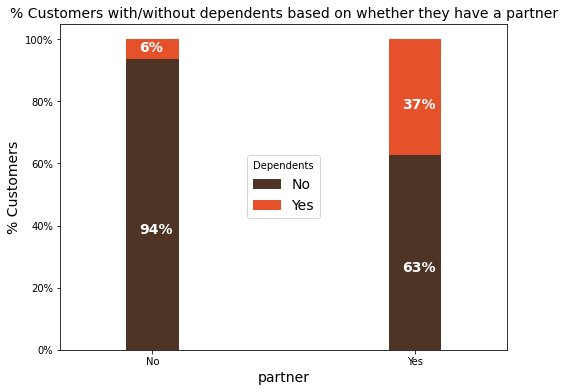

In [36]:
colors = ['#4D3425','#E4512B']
partner_dependents = df_churn.groupby(['partner','dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

63%  Customer yang mempunyai partner (pasangan hidup) namun tidak memiliki tanggungan akan churn, dan 37% customer yang mempunyai partner (pasangan hidup) sekaligus memiliki tanggungan (dependent) akan churn

94% Customer yang tidak mempunyai partner (pasangan hidup) dan tidak memiliki tanggungan akan churn, dan 6% customer yang tidak mempunyai partnersekaligus memiliki tanggungan akan churn

Text(0.5, 1.0, '% of Senior Citizens')

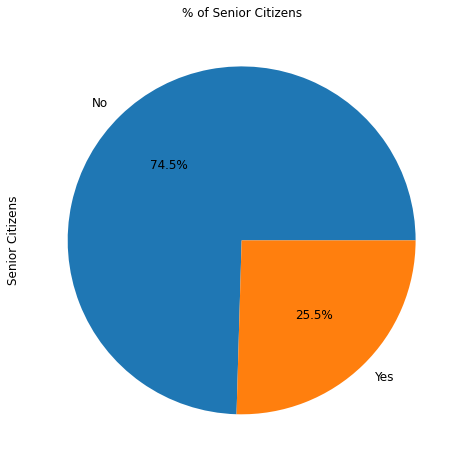

In [37]:
import matplotlib.ticker as mtick # For specifying the axes tick format 

ax = (df_churn['seniorcitizen'].value_counts()*100.0 /len(df_churn))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(12,8), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Senior Citizens ada 25.5% customer churn, dan 74.5% bukan senior citizen yang churn

Text(0.5, 1.0, '# of Customers by Contract Type')

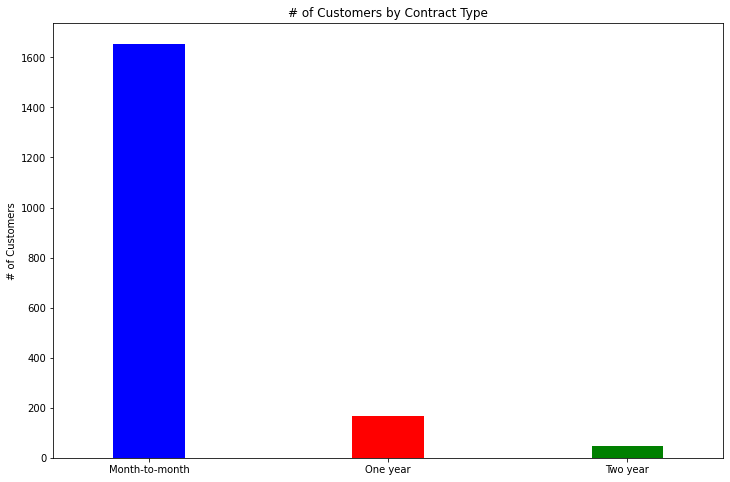

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = df_churn['contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, color=['b', 'r', 'g'])
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Lebih dari 1600 Customer dengan type contracts Month-to-month melakukan churn

In [39]:
df_churn['paymentmethod'].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

Text(0.5, 1.0, '% of Payment Methods')

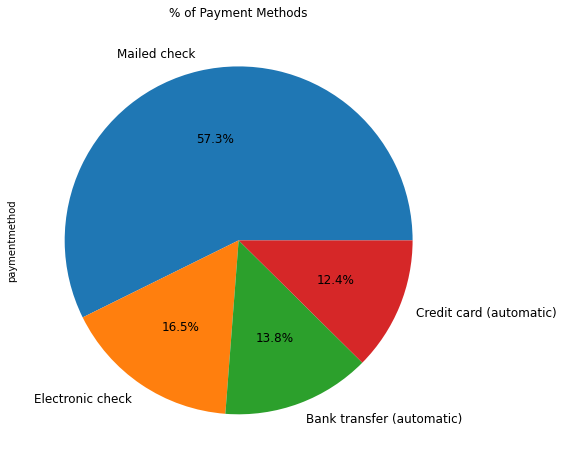

In [40]:
import matplotlib.ticker as mtick # For specifying the axes tick format 

ax = (df_churn['paymentmethod'].value_counts()*100.0 /len(df_churn))\
.plot.pie(autopct='%.1f%%', labels = ['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'],figsize =(12,8), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Payment Methods', fontsize = 12)

Customer yang churn mayoritas payment method adalah mailed check 57.3%, kemudian Electronic check, 16.5%, Bank transfer 13.8%, dan 12.4% Credit Card

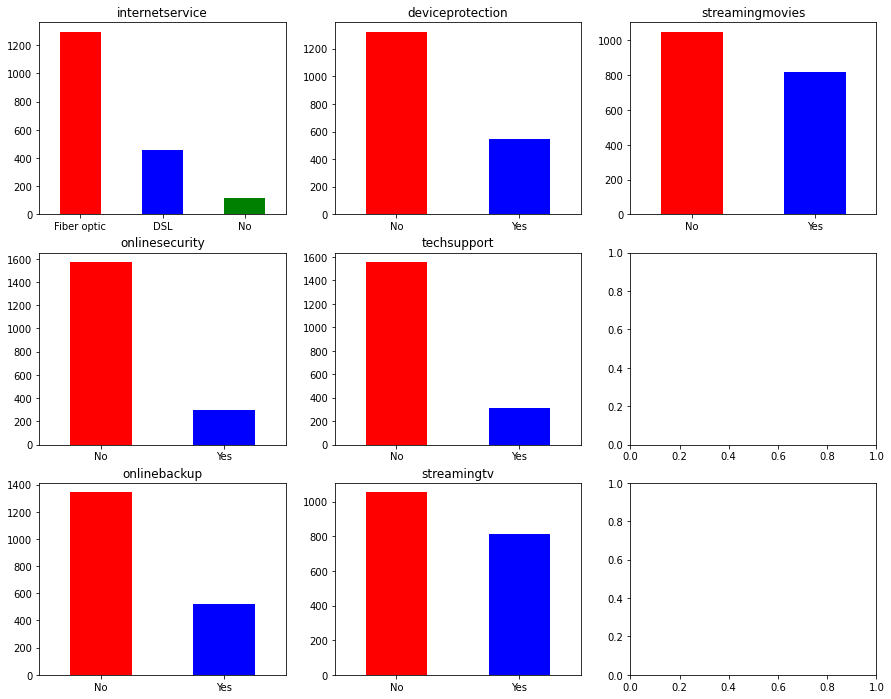

In [41]:
services = ['internetservice','onlinesecurity',
           'onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df_churn[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color=['red', 'blue', 'green'])
        
    elif i >=3 and i < 6:
        ax = df_churn[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0, color=['red', 'blue'])
        
    elif i < 9:
        ax = df_churn[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0, color=['red', 'blue'])
    ax.set_title(item)

Kita bisa lihat customer yang churn berdasarakan beberapa kriteria, untuk deviceprotection, streamingmovies, onlinesecurity, techsupport, onlinebackup dan streamingtv persentasi lebih besar adalah No. Untuk customer churn internet service mayoritas adalah Fiber Optic

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

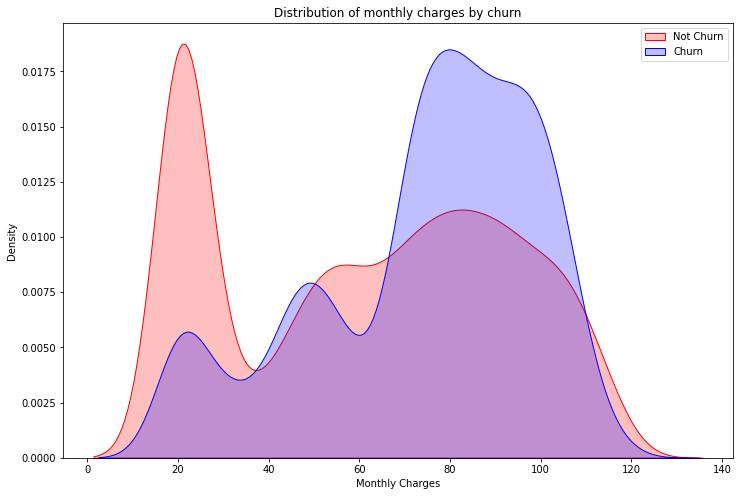

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.kdeplot(df.monthlycharges[(df["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df.monthlycharges[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Persentase customer yang churn lebih tinggi saat Monthly Charges tinggi

Text(0.5, 1.0, 'Distribution of Total Charges by churn')

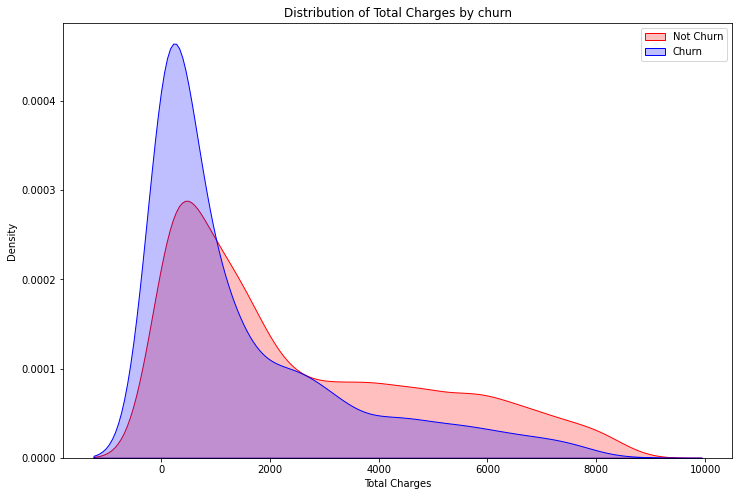

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.kdeplot(df.totalcharges[(df["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df.totalcharges[(df["churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by churn')

Terlihat bahwa customer churn tinggi ketika Total Charges rendah

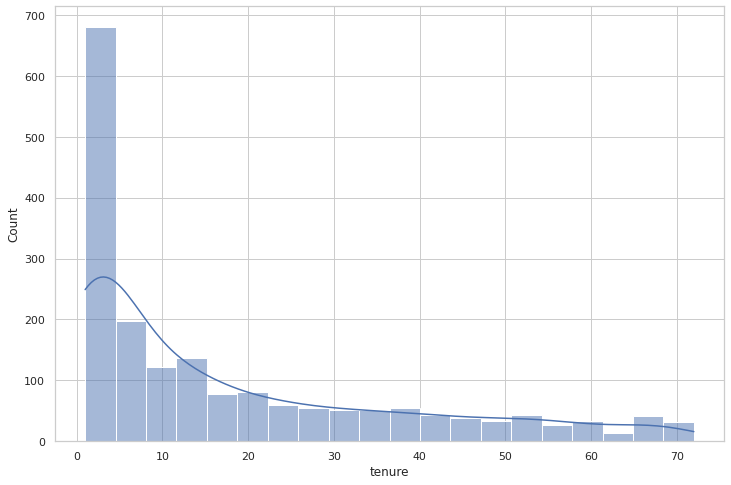

In [87]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=df_churn, x="tenure", bins=20, kde=True)

Customer churn mayoritas tenure dibawah 10 bulan

### Data Preprocessing

In [44]:
X = df.iloc[:, :-1]
y = df['churn']

In [45]:
X.head()

,seniorcitizen,partner,dependents,tenure,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [46]:
X.shape

(7032, 16)

Split model menjadi data train, validation, dan test

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

Kita definiskan kelas MultiColumnLabelEncoder untuk membuat beberapa fungsi untuk mentransformasikan bebebrapa variabel kategorik sekaligus dengan LabelEncoder 

In [48]:
class MultiColumnLabelEncoder:

    def __init__(self, columns=None):
        self.columns = columns # array of column names to encode


    def fit(self, X, y=None):
        self.encoders = {}
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self


    def transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].transform(X[col])
        return output


    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)


In [49]:
cat_cols = MultiColumnLabelEncoder(columns=cat_cols)

In [50]:
X_train = cat_cols.fit_transform(X_train)

In [51]:
X_test = cat_cols.transform(X_test)
X_val = cat_cols.transform(X_val)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(5344, 16)
(352, 16)
(1336, 16)


In [53]:
numeric_cols_scaler = num_cols[1:-1]
numeric_cols_scaler

['tenure', 'monthlycharges', 'totalcharges']

In [54]:
tf.convert_to_tensor(X_train)

<tf.Tensor: shape=(5344, 16), dtype=float64, numpy=
array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 5.9900e+01,
        5.4240e+02],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 2.0000e+00, 7.0050e+01,
        3.0260e+02],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 2.0050e+01,
        6.7820e+02],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0000e+00, 9.8250e+01,
        5.6060e+02],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 2.0000e+00, 1.0175e+02,
        7.0693e+03],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 9.7800e+01,
        5.4588e+03]])>

In [55]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train)

### Pendefinisian Model

#### Sequential API

In [90]:
def first_model():
  model = tf.keras.Sequential([
        normalizer,    
         tf.keras.layers.Dense(64, activation='relu', input_shape=(16,)),
         tf.keras.layers.Dense(32, activation='relu'),
         tf.keras.layers.Dense(1, activation='sigmoid')
         ])
  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['Accuracy', 'Recall'])
  return model

In [91]:
first_model = first_model()
first_history = first_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
167/167 [==============================] - 2s 7ms/step - loss: 0.4758 - Accuracy: 0.7717 - recall: 0.3704 - val_loss: 0.3975 - val_Accuracy: 0.8061 - val_recall: 0.5015
Epoch 2/100
167/167 [==============================] - 1s 5ms/step - loss: 0.4321 - Accuracy: 0.7915 - recall: 0.5169 - val_loss: 0.3976 - val_Accuracy: 0.8061 - val_recall: 0.5438
Epoch 3/100
167/167 [==============================] - 1s 5ms/step - loss: 0.4262 - Accuracy: 0.8015 - recall: 0.5404 - val_loss: 0.3955 - val_Accuracy: 0.8009 - val_recall: 0.4864
Epoch 4/100
167/167 [==============================] - 1s 5ms/step - loss: 0.4225 - Accuracy: 0.8013 - recall: 0.5273 - val_loss: 0.3945 - val_Accuracy: 0.8076 - val_recall: 0.4924
Epoch 5/100
167/167 [==============================] - 1s 5ms/step - loss: 0.4190 - Accuracy: 0.8028 - recall: 0.5363 - val_loss: 0.3931 - val_Accuracy: 0.8099 - val_recall: 0.4834
Epoch 6/100
167/167 [==============================] - 1s 5ms/step - loss: 0.4185 - Accuracy: 0

In [92]:
first_history.history.keys()

dict_keys(['loss', 'Accuracy', 'recall', 'val_loss', 'val_Accuracy', 'val_recall'])

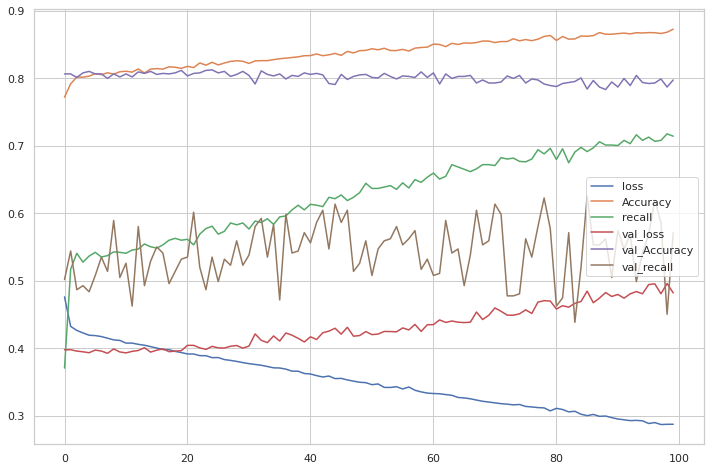

In [94]:
import pandas as pd
pd.DataFrame(first_history.history).plot(figsize=(12,8));

Dari Grafik diatas dapat disimpulkan overfitting sehingga kita perlu menggunakan beberapa regularization sepertii batch Normalization, weight initialization dan Drop Out untuk improvement model


Dengan menggunakan Epoch 100 kali didapatkan loss: 0.2872 - Accuracy: 0.8724 - recall: 0.7139 - val_loss: 0.4817 - val_Accuracy: 0.7972 - val_recall: 0.5710

#### Improvement Model

Untuk model kita gunakan 4 Hidden Layers, Weight Initalization, BatchNormalization, Dropout 20%, fungsi activation nya relu, dan sigmoid untuk memprediksi kasus binary class. Optimizer kita gunakan adam dan fungsi loss adalah binary cross entropy sedangakn untuk metrics kita gunakan accuracy dan Recall

In [56]:
def get_basic_model():
  model = tf.keras.Sequential([
        normalizer,    
         tf.keras.layers.Dense(32, input_shape=(16,), kernel_initializer="he_normal", use_bias=False),
         tf.keras.layers.Dropout(rate=0.2),
         tf.keras.layers.BatchNormalization(),
         tf.keras.layers.Activation('relu'),
         tf.keras.layers.Dense(16, kernel_initializer="he_normal", use_bias=False),
         tf.keras.layers.Dropout(rate=0.2),
         tf.keras.layers.BatchNormalization(),
         tf.keras.layers.Activation('relu'),
         tf.keras.layers.Dense(8, kernel_initializer="he_normal", use_bias=False),
         tf.keras.layers.Dropout(rate=0.2),
         tf.keras.layers.BatchNormalization(),
         tf.keras.layers.Activation('relu'),
         tf.keras.layers.Dense(4, kernel_initializer="he_normal", use_bias=False),
         tf.keras.layers.Dropout(rate=0.2),
         tf.keras.layers.BatchNormalization(),
         tf.keras.layers.Activation('relu'),
         tf.keras.layers.Dense(1, activation='sigmoid')
         ])
  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['Accuracy', 'Recall'])
  return model

**Penjelasan Model**

1. Input data ada 16 features
2. Jumlah Node pada hidden layer pertama adalah 32, kemudian Hidden layer kedua 16, Hidden layer ke tiga 8, dan hidden layer keempat adalah 4.
3. Weight Inizialition digunakan untuk mengatur weight pada Neural Network ke small random values. Karena kita menggunakan fungsi aktivasinya adalah Relu maka kita gunakan Weight Inizialition adalah He
4. Batch Normalization digunakan untuk scaling dan pembatasan input pada setiap batch
5. Drop Out=0.2 artinya sebanyak 20 persen node pada hidden layer diaknonatifkan secara random yang digunakan untuk mengurangi overfit
6. Output hanya 1 hidden layer karena binary class dan menggunakan fungsi activasi sigmoid
7. Optimizer adam
8. fungsi loss adalah BinaryCrosseEntropy untuk binary class
9. Metrics Acuracy dan Recall


Karena data nya imbalanced maka kita tidak bisa menggunakan accuracy sebagai patokan sehingga kita gunakan Recall sebagai metrics evaluasi model dikarenakan kita ingin fokus kesalahan memprediksi customer yang tidak churn tapi churn dengan menurunkan presentase False Negatif. Jika customer potential atau diprediksi churn maka kita bisa gunakan strategy dengan memberikan diskon atau promosi agar tidak kehilangan customer tersebut sedangkan untuk customer yang tidak churn namun faktanya churn kerugiannya adalah kita akan kehilangan customer maka dari itu kita fokuskan menurunkan terhadap kesalahan prediksi pada kasus tersebut.

In [57]:
training_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

In [58]:
validation_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

In [59]:
train_batches = training_dataset.shuffle(1000).batch(250)
val_batches = validation_dataset .shuffle(1000).batch(250)


In [60]:
model = get_basic_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 16)               33        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                512       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                5

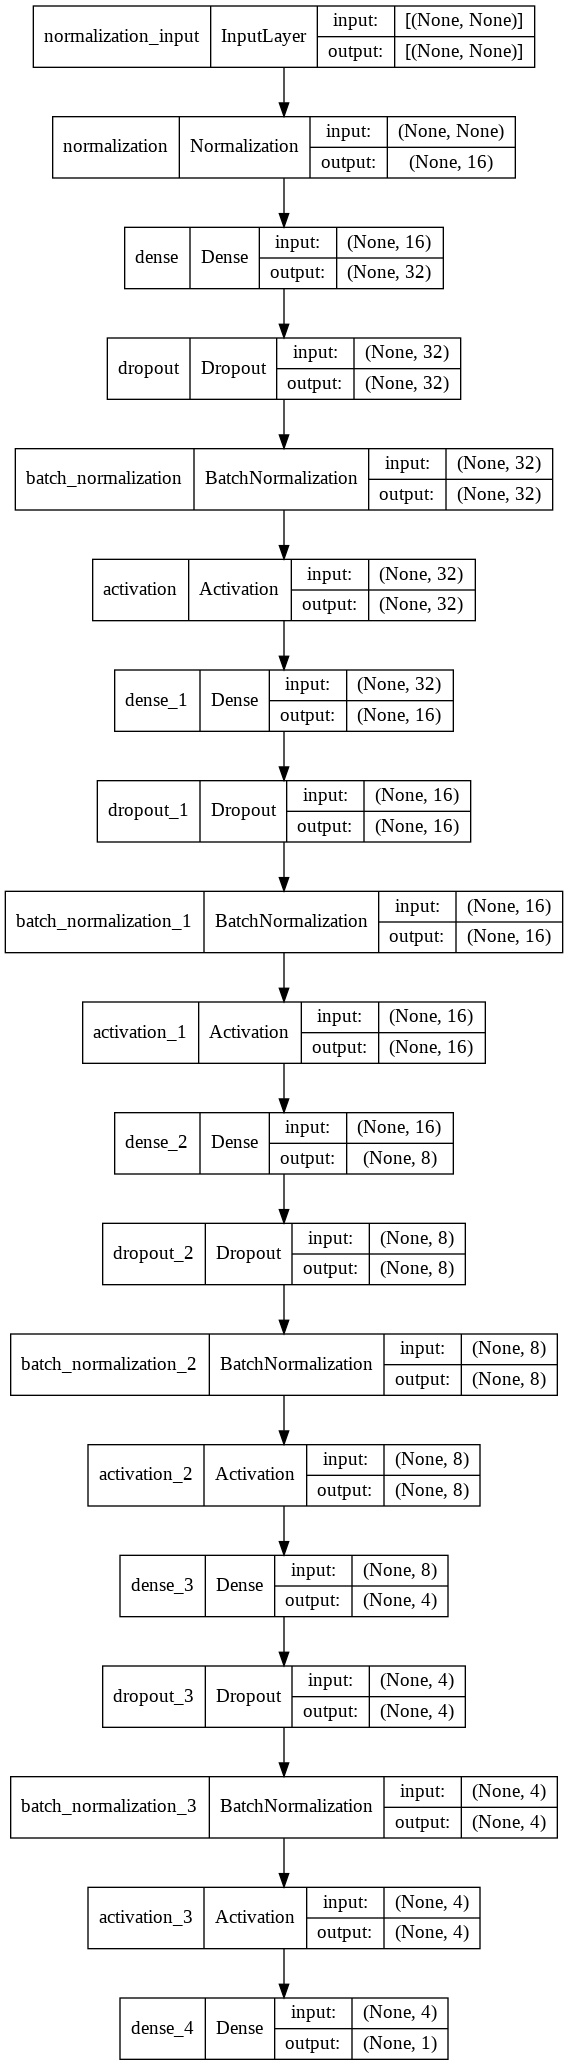

In [61]:
plot_model(model, "my_nn.png", show_shapes=True)

#### Functional API

Model sama dengan Sequential API namun sekarang tidak kita gunakan untuk training, namun kita akan lihat model summarynya.

In [62]:
from tensorflow import keras
def model_functional_api():
  input_ = keras.layers.Input(shape=X_train.shape[1:])
  hidden1 = keras.layers.Dense(32, kernel_initializer="he_normal", use_bias=False)(input_)
  dropout1 = keras.layers.Dropout(rate=0.2)(hidden1)
  normal1 = keras.layers.BatchNormalization()(dropout1)
  active1 = keras.layers.Activation('relu')(normal1)
  hidden2 = keras.layers.Dense(16, kernel_initializer="he_normal", use_bias=False)(active1)
  dropout2 = keras.layers.Dropout(rate=0.2)(hidden2)
  normal2 = keras.layers.BatchNormalization()(dropout2)
  active2 = keras.layers.Activation('relu')(normal2)
  hidden3 = keras.layers.Dense(8, kernel_initializer="he_normal", use_bias=False)(active2)
  dropout3 = keras.layers.Dropout(rate=0.2)(hidden3)
  normal3 = keras.layers.BatchNormalization()(dropout3)
  active3 = keras.layers.Activation('relu')(normal3)
  hidden4 = keras.layers.Dense(4, kernel_initializer="he_normal", use_bias=False)(active3)
  dropout4 = keras.layers.Dropout(rate=0.2)(hidden4)
  normal4 = keras.layers.BatchNormalization()(dropout4)
  active4 = keras.layers.Activation('relu')(normal4)
  concat = keras.layers.concatenate([input_, active4])
  output = keras.layers.Dense(1,  activation='sigmoid')(concat)
  model = keras.models.Model(inputs=[input_], outputs=[output])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['Accuracy', 'Recall'])
  return model

In [63]:
model_functional_api = model_functional_api()
model_functional_api.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 16)]         0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 32)           512         ['input_1[0][0]']                
                                                                                                  
 dropout_4 (Dropout)            (None, 32)           0           ['dense_5[0][0]']                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 32)          128         ['dropout_4[0][0]']              
 rmalization)                                                                                 

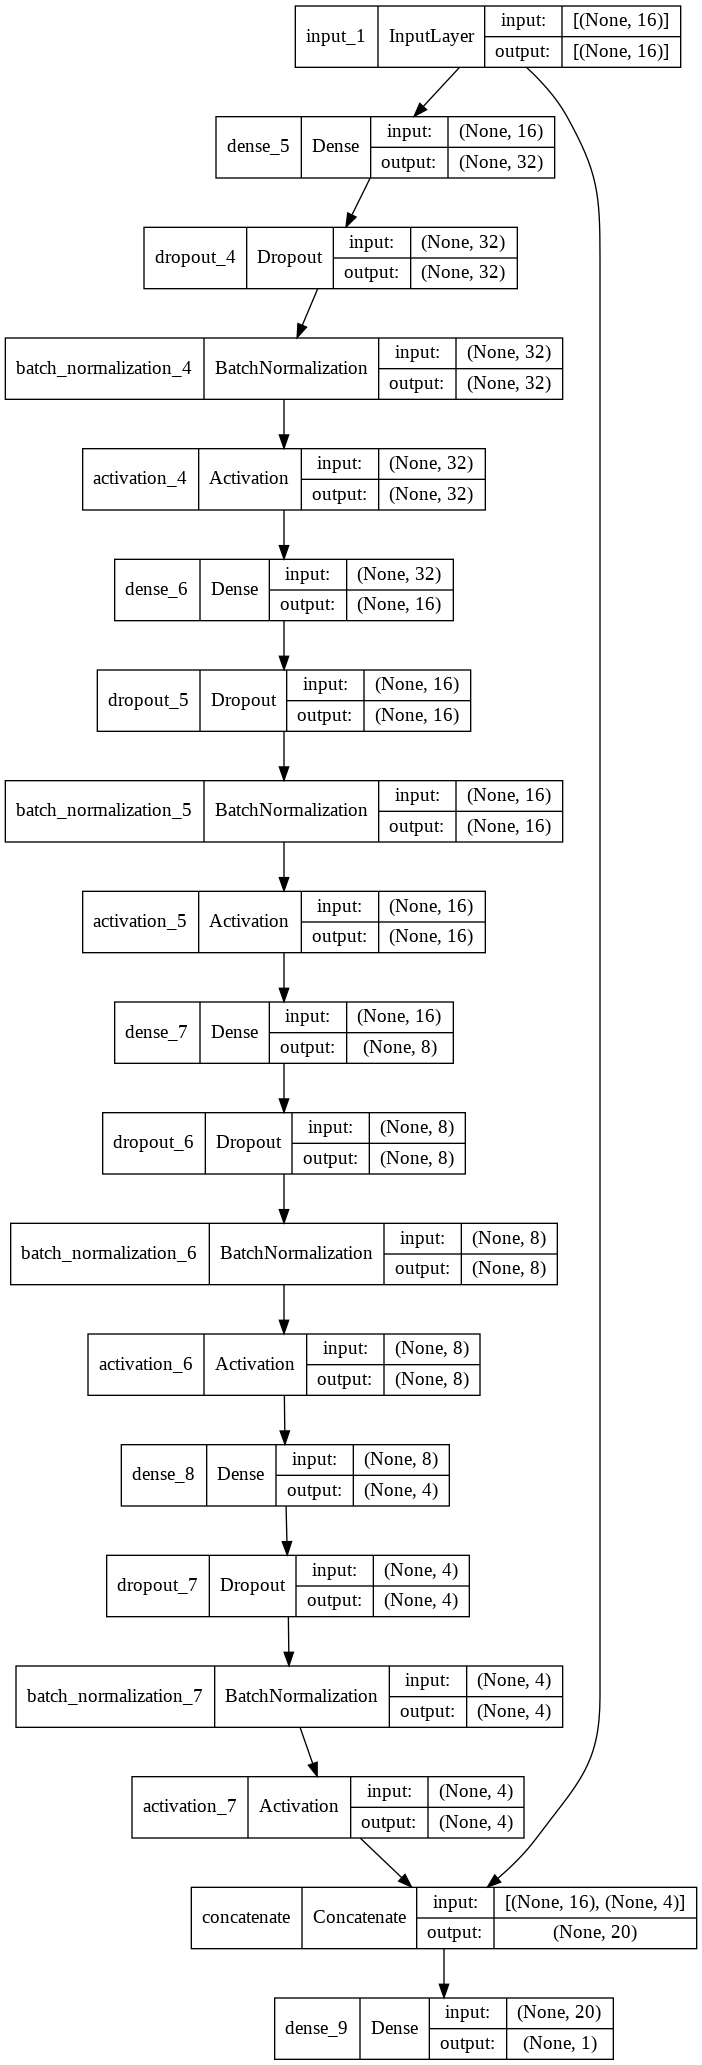

In [81]:
plot_model(model_functional_api, "my_nn2.png", show_shapes=True)

### Pelatihan Model

In [65]:
history = model.fit(train_batches, validation_data=val_batches, epochs=100)

Epoch 1/100
22/22 [==============================] - 3s 28ms/step - loss: 0.6567 - Accuracy: 0.6606 - recall: 0.1735 - val_loss: 0.6607 - val_Accuracy: 0.7193 - val_recall: 0.2659
Epoch 2/100
22/22 [==============================] - 0s 12ms/step - loss: 0.6180 - Accuracy: 0.7000 - recall: 0.1534 - val_loss: 0.6074 - val_Accuracy: 0.7597 - val_recall: 0.2628
Epoch 3/100
22/22 [==============================] - 0s 11ms/step - loss: 0.5986 - Accuracy: 0.7204 - recall: 0.0857 - val_loss: 0.5656 - val_Accuracy: 0.7500 - val_recall: 0.1269
Epoch 4/100
22/22 [==============================] - 0s 11ms/step - loss: 0.5758 - Accuracy: 0.7283 - recall: 0.0574 - val_loss: 0.5330 - val_Accuracy: 0.7567 - val_recall: 0.0363
Epoch 5/100
22/22 [==============================] - 0s 11ms/step - loss: 0.5638 - Accuracy: 0.7294 - recall: 0.0449 - val_loss: 0.5082 - val_Accuracy: 0.7560 - val_recall: 0.0181
Epoch 6/100
22/22 [==============================] - 0s 11ms/step - loss: 0.5535 - Accuracy: 0.7298 

### Evaluasi Model

In [66]:
history.history.keys()

dict_keys(['loss', 'Accuracy', 'recall', 'val_loss', 'val_Accuracy', 'val_recall'])

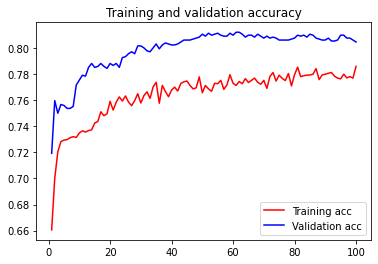

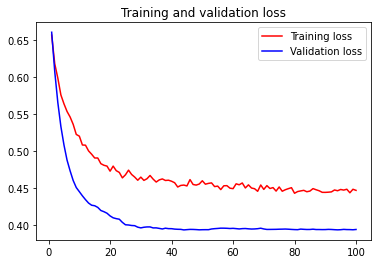

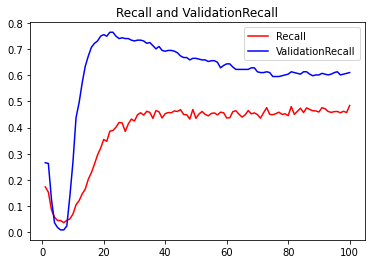

In [67]:
# Visualize accuracy and loss for train and validation data

acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
rec = history.history['recall']
val_rec = history.history['val_recall']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.figure()
plt.title('Recall and ValidationRecall')
plt.plot(epochs, rec, 'red', label='Recall')
plt.plot(epochs, val_rec, 'blue', label='ValidationRecall')

plt.legend()
plt.show()

Hasil dari improvement model dengan menambahkan hidden layer, Weight initialization, Batch Normalization, dan drop out dapat mengatasi model yang **overfitting**.

Berdasarkan grafik diatas untuk metrics Accuracy dan Recall bisa dikatakan **underfitting** karena nilai pada hasil training lebih rendah yang artinya model tidak bisa belajar dengan baik. ini dimungkinkan dikarenakan pemilihan Regularization yang masih kurang tepat kedepannya perlu dilakukan uji coba dengan mengubah Regularization yang ada. Untuk nilai lossnya pada hasil training dan validasinya cukup tinggi dan memiliki perbedaan yang cukup signifikan.

Dengan menggunakan Epoch 100 kali didapatkan loss: 0.4467 - Accuracy: 0.7859 - recall: 0.4845 dan untuk nilai validasinya adalah val_loss: 0.3938 - val_Accuracy: 0.8046 - val_recall: 0.6103

### Model Saving

It is possible to partially save the model. However, here we are going to save the entire model with model.save(). As described in the documentation:

You can save an entire model to a single artifact. It will include :
- The model's architecture/config
- The model's weight values [which were learned during training]
- The model's compilation information [if compile] was called
- The optimizer and its state, if any [this enables you to restart training where you left]

In [69]:
MODEL_PATH = "./tf_model"
model.save(MODEL_PATH)

INFO:tensorflow:Assets written to: ./tf_model/assets


In [70]:
model_final = tf.keras.models.load_model(MODEL_PATH)

Karena terdapat [issue](https://github.com/tensorflow/tensorflow/issues/51911) pada load model dimana input data telah dinormalisasi maka kita tidak gunakan '.h5' 

### Model Inference

In [71]:
y_pred_proba = model_final.predict(X_test, verbose=0)[:, 0]
y_pred_proba[:5]

array([0.00908595, 0.13090993, 0.73252857, 0.18894425, 0.19460224],
      dtype=float32)

Karena target kita adalah binary class dimana NoChurn=0 dan Churn=1 maka kita definisikan jika nilai probability > 0.5 maka kita kelompokkan sebagai Churn dan nilai probability <= 0.5 maka kita kelompokkan sebagai NoChurn.

In [79]:
# predict the churn values
y_pred = model_final.predict(X_test)

# unscaling the ypred values 
y_pred_list = []
for i in y_pred:
    if i>0.5:
        y_pred_list.append(1)
    else:
        y_pred_list.append(0)

In [80]:
#make dataframe for comparing the orignal and predict values
data = {'orignal_churn':y_test, 'predicted_churn':y_pred_list}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
2481,0,0
6784,0,0
6125,1,1
3052,0,0
4099,0,0
3223,0,0
3774,0,0
3469,0,1
3420,0,0
1196,0,0


### Pengambilan Kesimpulan



A. Customer Churn mayoritas adalah Customer:

1. Tidak mempunyai pasangan dan tidak memiliki tanggungan atau mempunyai pasangan namun belum memiliki tanggungan
2. Bukan Senior Citizens
3. Type contracts Month-to-month
4. Metode pembayaran dengan menggunakan Mailed check
5. Type Internet service dengan fiberoptic
6. Tidak disediakan device protection, online security, tech support, dan onlinebackup. sedangkan untuk tersedianya streamingmovies maupun streamingtv
perbedaan antara customer churn dengan ada atau tidak ada layanan streaming tersebut perbedaanya tidak cukup besar
7. Monthly charges bulanan tinggi lebih dari 60
8. Total charges kurang dari 2000
9. Tenure kurang dari 10 bulan


B. Data untuk Customer Churn adalah data imbalanced dengan 27% Churn and 73% NoChurn, sehingga kita gunakan recall sebagai metrics evaluasi dengan tujuan meminimalkan kesalahan prediksi untuk customer yang tidak churn sedangkan faktanya adalah churn dengan tujuan kita tidak ingin kehilangan customer yang sudah berlangganan. 
Model pertama yang kita buat overfitting itu bisa dilihat dari perfomance metrics evaluasi Recall pada training yang jauh lebih besar dari recall validation dan begitu juga loss yang didapatkan pada training dibanding dengan loss pada validation. Improvent model dengan menambahkan hidden layer, Weight initialization, Batch Normalization, dan drop out namun model kita menjadi Underfitting dengan metrics evalusi recall pada data training adalah 0.4845 cukup berbeda jauh dengan recall pada data validation 0.6103.














### Future Work

Dikarenakan model kita tidak cukup bagus dengan nilai recall yang rendah maka kedepannya jika dapat waktu yang lebih kita perlu evaluasi:

1. Arsitektur modelnya yaitu jumlah hidden layer, parameter weight initialization, batch normalization, drop out, activation function dan lain sebagainya agar modelnya tidak overfitting maupun underfitting atau good fit
2. Penggunaan full pipeline dengan pemilihan parameter yang tepat
3. Penggunaan CallBacks